# Helmet Detection and License Plate extraction using YOLO and OCR

**Introduction:-**Due to their ability to minimize skull deceleration and reduce head motion during accidents, helmets are an essential component in the prevention of head injuries. By absorbing the force and dispersing it across a wider surface, they effectively protect the skull from serious damage. Furthermore, helmets serve as a mechanical barrier that keeps the head from making direct contact with outside objects. To reduce the number of fatalities and injuries, drivers must obey traffic laws. Complete conformity to these rules, however, is frequently absent in practice. Although manual CCTV camera surveillance is currently used, it is labor-intensive and ineffective in places with dense populations and large numbers of automobiles. This paper suggests an effective technique for complete helmet identification and license plate extraction using YOLOv8 and OCR in order to overcome these difficulties. The method includes gathering datasets, implementing neural networks for object classification, eliminating background data, and moving object identification. This technology may be used to recognize helmets accurately and automatically, improving road safety measures.

### Creating directories for data storage

In [3]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/val

### Mounting google drive and copying dataset into colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import shutil
shutil.copytree('/content/drive/MyDrive/PROJECT/dataset/train/images','/content/dataset/train/images')
shutil.copytree('/content/drive/MyDrive/PROJECT/dataset/train/labels','/content/dataset/train/labels')
shutil.copytree('/content/drive/MyDrive/PROJECT/dataset/val/images','/content/dataset/val/images')
shutil.copytree('/content/drive/MyDrive/PROJECT/dataset/val/labels','/content/dataset/val/labels')
shutil.copy('/content/drive/MyDrive/PROJECT/data.yaml','/content/dataset/data.yaml')

'/content/dataset/data.yaml'

### Aquiring GPUs

In [ ]:
import torch

print(torch.cuda.is_available())

True


In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
Sun Oct 29 17:46:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |       

### YOLO Model building

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 82.4MB/s]


### Training the Model

In [ ]:
model.train(data="/content/dataset/data.yaml",epochs=60,batch=16)

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=60, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([15, 16, 18, 19])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3bfa9494b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [ ]:
#command line format for traing the Model
#!yolo task=detect mode=train model=yolov8s.pt data=/content/dataset/data.yaml epochs=25 imgsz=640 plots=true

In [5]:
model = YOLO("/content/drive/MyDrive/PROJECT/results/weights/best.pt")

### Predicting sample image

In [ ]:
opImg=model.predict("/content/Riding-a-bike-without-a-helmet-in-Hyderabad_-Well-the-IIT-and-the-city-police-are-working-on-a-system-to-fine-you. (1).webp")


image 1/1 /content/Riding-a-bike-without-a-helmet-in-Hyderabad_-Well-the-IIT-and-the-city-police-are-working-on-a-system-to-fine-you. (1).webp: 640x448 1 Number Plate, 1 Two Wheeler, 2 No Helmets, 12.0ms
Speed: 2.8ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


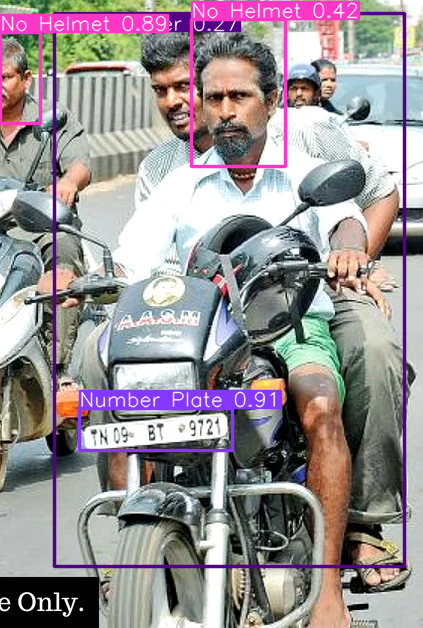

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(opImg[0].plot())

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 32.2 MB/s eta 0:00:00


### Number plate extraction from an image

In [ ]:
import cv2
import easyocr

def overlap(x1,y1,w1,h1,x2,y2,w2,h2):
  x1a = x1 - (w1/2)
  y1a = y1 - (h1/2)
  x2a = x1a + w1
  y2a = y1a + h1
  x1b = x2 - (w2/2)
  y1b = y2 - (h2/2)
  x2b = x1b + w2
  y2b = y1b + h2
  # Calculate the coordinates of the intersection
  X1 = max(x1a,x1b)
  Y1 = max(y1a,y1b)
  X2 = min(x2a,x2b)
  Y2 = min(y2a,y2b)
  # Calculate the area of intersection
  W = max(0,(X2-X1))
  H = max(0,(Y2-Y1))
  intersection_area = W * H
  # Calculate the areas of both rectangles
  area1 = w1*h1
  area2 = w2*h2
  # Calculate the percentage of overlap
  overlap_percent = ( area2/(area1 + area2 - intersection_area)) * 100
  return overlap_percent

def extract(image):
  reader = easyocr.Reader(['en'])
  result = reader.readtext(image)
  for i in result:
    print (i[1],end=" ")

results=model.predict("/content/Riding-a-bike-without-a-helmet-in-Hyderabad_-Well-the-IIT-and-the-city-police-are-working-on-a-system-to-fine-you. (1).webp")
frame = cv2.imread("/content/Riding-a-bike-without-a-helmet-in-Hyderabad_-Well-the-IIT-and-the-city-police-are-working-on-a-system-to-fine-you. (1).webp")
for result in results:
      boxes = result.boxes.cpu().numpy()
      clas=result.boxes.cls
      for box, cl in zip(boxes,clas):
        if cl==19:
          Xnh,Ynh,Wnh,Hnh=box.xywh[0].astype(int)
          for box, cl in zip(boxes,clas):
            if cl==16:
              Xtw,Ytw,Wtw,Htw=box.xywh[0].astype(int)
              percent=overlap(Xnh,Ynh,Wnh,Hnh,Xtw,Ytw,Wtw,Htw)
              if percent>=70:
                for box, cl in zip(boxes,clas):
                  if cl==15:
                    Xnp,Ynp,Wnp,Hnp=box.xywh[0].astype(int)
                    r=box.xyxy[0].astype(int)
                    percent=overlap(Xnp,Ynp,Wnp,Hnp,Xtw,Ytw,Wtw,Htw)
                    if percent>=70:
                      crop = frame[r[1]:r[3], r[0]:r[2]]
                      extract(crop)
                      cv2.imwrite("_"+".jpg", crop)


image 1/1 /content/Riding-a-bike-without-a-helmet-in-Hyderabad_-Well-the-IIT-and-the-city-police-are-working-on-a-system-to-fine-you. (1).webp: 640x448 1 Number Plate, 1 Two Wheeler, 1 No Helmet, 11.2ms
Speed: 2.4ms preprocess, 11.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


05 B 921 

###

In [ ]:
import cv2
import easyocr
img = cv2.imread("/content/_.jpg")
img1=cv2.resize(img,(img.shape[1]*10,img.shape[0]*10))
reader = easyocr.Reader(['en'])
result = reader.readtext(img1)
for j in result:
  print(j)
for i in result :
  print (i[1],end=" ")

([[59, 165], [568, 165], [568, 385], [59, 385]], 'X 0', 0.13958240158534413)
([[642, 132], [880, 132], [880, 342], [642, 342]], 'ET', 0.29769537215978437)
([[974, 146], [1078, 146], [1078, 266], [974, 266]], '7', 0.17107065291662593)
([[1054, 64], [1455, 64], [1455, 320], [1054, 320]], '9721', 0.7632948859508804)
X 0 ET 7 9721 

### extracting Number plate from video

In [ ]:
import cv2
from datetime import datetime
import easyocr


def overlap(x1,y1,w1,h1,x2,y2,w2,h2):
  x1a = x1 - (w1/2)
  y1a = y1 - (h1/2)
  x2a = x1a + w1
  y2a = y1a + h1
  x1b = x2 - (w2/2)
  y1b = y2 - (h2/2)
  x2b = x1b + w2
  y2b = y1b + h2
  # Calculate the coordinates of the intersection
  X1 = max(x1a,x1b)
  Y1 = max(y1a,y1b)
  X2 = min(x2a,x2b)
  Y2 = min(y2a,y2b)
  # Calculate the area of intersection
  W = max(0,(X2-X1))
  H = max(0,(Y2-Y1))
  intersection_area = W * H
  # Calculate the areas of both rectangles
  area1 = w1*h1
  area2 = w2*h2
  # Calculate the percentage of overlap
  overlap_percent = ( area2/(area1 + area2 - intersection_area)) * 100
  return overlap_percent

def extract(image):
  reader = easyocr.Reader(['en'])
  result = reader.readtext(image)
  return result



video_path = "/content/BB_4dda3575-ef9e-4790-aefd-7373d72fb614_preview.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
  # Read a frame from the video
  success, frame = cap.read()
  if success:
    results=model.predict(frame)
    for result in results:
      boxes = result.boxes.cpu().numpy()
      clas=result.boxes.cls
      for box, cl in zip(boxes,clas):
        if cl==19:
          Xnh,Ynh,Wnh,Hnh=box.xywh[0].astype(int)
          for box, cl in zip(boxes,clas):
            if cl==16:
              Xtw,Ytw,Wtw,Htw=box.xywh[0].astype(int)
              percent=overlap(Xnh,Ynh,Wnh,Hnh,Xtw,Ytw,Wtw,Htw)
              if percent>=70:
                for box, cl in zip(boxes,clas):
                  if cl==15:
                    Xnp,Ynp,Wnp,Hnp=box.xywh[0].astype(int)
                    r=box.xyxy[0].astype(int)
                    percent=overlap(Xnp,Ynp,Wnp,Hnp,Xtw,Ytw,Wtw,Htw)
                    if percent>=70:
                      crop = frame[r[1]:r[3], r[0]:r[2]]
                      text = extract(crop)
                      time = datetime.now().strftime("%Y%m%d_%H%M%S")
                      if len(text)==0:
                        cv2.imwrite("_" +time + ".jpg", crop)
                      else:
                        cv2.imwrite(text[0][1] +"_" +time + ".jpg", crop)
  else:
    break
cap.release()
cv2.destroyAllWindows()



0: 384x640 1 Number Plate, 3 Two Wheelers, 1 No Helmet, 191.1ms
Speed: 22.1ms preprocess, 191.1ms inference, 40.6ms postprocess per image at shape (1, 3, 384, 640)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete


0: 384x640 2 Number Plates, 3 Two Wheelers, 2 No Helmets, 11.2ms
Speed: 5.3ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Two Wheelers, 3 No Helmets, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Number Plate, 3 Two Wheelers, 2 No Helmets, 11.5ms
Speed: 2.6ms preprocess, 11.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Number Plate, 3 Two Wheelers, 2 No Helmets, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Two Wheelers, 3 No Helmets, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Number Plate, 3 Two Wheelers, 1 No Helmet, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Number Plates, 3 Two Wheelers, 1 No Helmet, 13

KeyboardInterrupt: ignored